In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc,roc_auc_score,precision_score,recall_score
from sklearn.metrics import classification_report

C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = pd.read_csv('train_2v.csv')
test = pd.read_csv('test_2v.csv')
train.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
test.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (5110, 12)
Test Data Shape: (5110, 12)


# Checking missive values

In [5]:
train_missing_values = train.isnull().sum()
train_missing_values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Data preprocessing

Clean the missing values both training and testing data

In [6]:
train_data = train.dropna(axis = 0, how='any')
test_data = test.dropna(axis = 0, how='any')
print('Train Data Shape: {}'.format(train.shape))
print('Test Data Shape: {}'.format(test.shape))

Train Data Shape: (5110, 12)
Test Data Shape: (5110, 12)


# Checking unique values in a dataset

In [7]:
train_data['stroke'].unique()

array([1, 0], dtype=int64)

In [8]:
train_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
train_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

# Finding the no.of patients affected by stroke

In [10]:
train_data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

Text(0.5, 1.0, 'No.of patients affected by stroke')

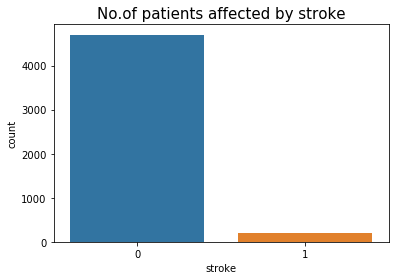

In [11]:
sns.countplot(x=train_data['stroke'])
plt.title('No.of patients affected by stroke',fontsize = 15)

# Fideing the gender count

In [12]:
train_data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

# Grouping the gender based on stroke

In [13]:
train_data.groupby(['gender'])['stroke'].value_counts()

gender  stroke
Female  0         2777
        1          120
Male    0         1922
        1           89
Other   0            1
Name: stroke, dtype: int64

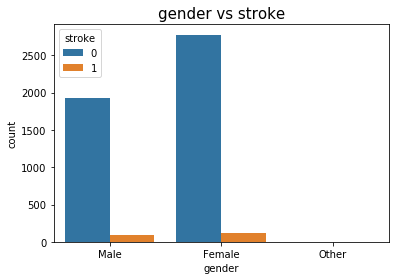

In [14]:
sns.countplot(x=train_data['gender'], hue = train_data['stroke'])
plt.title('gender vs stroke',fontsize = 15)
plt.show()

# Finding the smoking_status count

In [15]:
train_data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

# Grouping the smoling_status based on stroke

In [16]:
train_data.groupby(['smoking_status'])['stroke'].value_counts()

smoking_status   stroke
Unknown          0         1454
                 1           29
formerly smoked  0          780
                 1           57
never smoked     0         1768
                 1           84
smokes           0          698
                 1           39
Name: stroke, dtype: int64

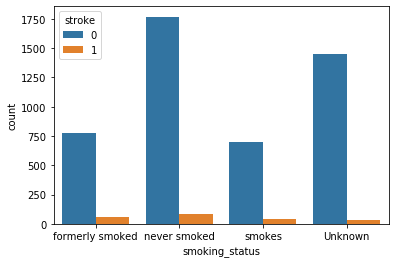

In [17]:
sns.countplot(x = train_data['smoking_status'], hue = train_data['stroke'])
plt.show()

# seperating data into two parts (object & integer)

In [18]:
str_data = train_data.select_dtypes(include=['object'])

In [19]:
str_dt = test_data.select_dtypes(include=['object'])

In [20]:
int_data = train_data.select_dtypes(include = ['integer','float'])
int_dt = test_data.select_dtypes(include = ['integer','float'])

# LabelEncoder

# Applying LabeleEncoder to convert object into integer

In [21]:
label = LabelEncoder()
features = str_data.apply(label.fit_transform)
features = features.join(int_data)
features.head()

,gender,ever_married,work_type,Residence_type,smoking_status,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,1,1,2,1,1,9046,67.0,0,1,228.69,36.6,1
2,1,1,2,0,2,31112,80.0,0,1,105.92,32.5,1
3,0,1,2,1,3,60182,49.0,0,0,171.23,34.4,1
4,0,1,3,0,2,1665,79.0,1,0,174.12,24.0,1
5,1,1,2,1,1,56669,81.0,0,0,186.21,29.0,1


# Defining featrues and label

In [22]:
xtrain = features.drop(['stroke','id'], axis = 1)
xtrain.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
0,1,1,2,1,1,67.0,0,1,228.69,36.6
2,1,1,2,0,2,80.0,0,1,105.92,32.5
3,0,1,2,1,3,49.0,0,0,171.23,34.4
4,0,1,3,0,2,79.0,1,0,174.12,24.0
5,1,1,2,1,1,81.0,0,0,186.21,29.0


In [23]:
ytrain = features['stroke']
ytrain.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

# split the data into training and testing

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(xtrain,ytrain)

In [25]:
x_train.head()

,gender,ever_married,work_type,Residence_type,smoking_status,age,hypertension,heart_disease,avg_glucose_level,bmi
2123,0,0,2,0,0,25.0,0,0,134.33,19.5
1385,0,1,2,1,1,45.0,0,0,89.05,27.8
1174,0,0,4,0,0,11.0,0,0,122.75,14.3
3137,1,0,4,1,0,10.0,0,0,70.70,25.4
3606,1,1,3,0,0,45.0,1,0,239.19,52.5


# Building NaiveBayes Model

In [26]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [27]:
predict = model.predict(x_test)
predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [28]:
test_score = model.score(x_test, y_test)
print("NBtest_score:", test_score)

NBtest_score: 0.8794788273615635


In [29]:
train_score = model.score(x_train, y_train)
print("NBtrain_score:",train_score)

NBtrain_score: 0.8766639500135832


# Crossvalidation

In [30]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, xtrain, ytrain, cv=5 )
cv_results

{'fit_time': array([0.00399399, 0.00399613, 0.00399399, 0.00399256, 0.00798726]),
 'score_time': array([0.00399494, 0.0039959 , 0.0039947 , 0.00399637, 0.        ]),
 'test_score': array([0.86965377, 0.86965377, 0.8706721 , 0.86354379, 0.88583078])}

# NaiveBayes Confusion Matrix

In [31]:
conf_mtr = pd.crosstab(y_test, predict)
conf_mtr

col_0,0,1
stroke,,
0,1061,111
1,37,19


# Classification Report for naivebayes

In [32]:
report = classification_report(y_test, predict)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.91      0.93      1172
           1       0.15      0.34      0.20        56

    accuracy                           0.88      1228
   macro avg       0.56      0.62      0.57      1228
weighted avg       0.93      0.88      0.90      1228



# Building Decision Tree Model

In [33]:
dt_mod = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8)
dt_mod.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [34]:
y_pred = dt_mod.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
ts_dt_score = dt_mod.score(x_test, y_test)
print("DTtest_score:", ts_dt_score)

DTtest_score: 0.9609120521172638


In [36]:
tn_dt_score = dt_mod.score(x_train, y_train)
print("DTtrain_score:",tn_dt_score)

DTtrain_score: 0.9682151589242054


In [37]:
from sklearn.model_selection import cross_validate
cv_result = cross_validate(dt_mod, xtrain, ytrain, cv=5 )
cv_result

{'fit_time': array([0.01198292, 0.01601005, 0.01198101, 0.01198363, 0.01597571]),
 'score_time': array([0.00399351, 0.00399756, 0.00399542, 0.00399709, 0.        ]),
 'test_score': array([0.9389002 , 0.9389002 , 0.95112016, 0.94704684, 0.94699286])}

# DecisionTreeClassifier Confusion Matrix

In [38]:
conf_mt = pd.crosstab(y_test,y_pred)
conf_mt

col_0,0,1
stroke,,
0,1168,4
1,44,12


# Classification Report for DecisionTreeClassifier

In [39]:
reports = classification_report(y_test, y_pred)
print(reports)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1172
           1       0.75      0.21      0.33        56

    accuracy                           0.96      1228
   macro avg       0.86      0.61      0.66      1228
weighted avg       0.95      0.96      0.95      1228



# Building Neural Network

In [40]:
mlp_model = MLPClassifier()
mlp_model.fit(x_train, y_train)

MLPClassifier()

In [41]:
mlp_predict = mlp_model.predict(x_test)
mlp_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
ts_mlp_score = mlp_model.score(x_test, y_test)
print("NNtest_score:", ts_mlp_score)

NNtest_score: 0.9543973941368078


In [43]:
ts_mlp_score = mlp_model.score(x_train, y_train)
print("NNtrain_score:", ts_mlp_score)

NNtrain_score: 0.9581635425156207


In [44]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(mlp_model, xtrain, ytrain, cv=10 )
cv_results

{'fit_time': array([1.29427099, 0.7070539 , 0.97870994, 1.23035669, 1.36763167,
        1.52396393, 1.80958343, 0.92511368, 1.03062296, 2.21703887]),
 'score_time': array([0.        , 0.00399566, 0.0039947 , 0.00399446, 0.0039947 ,
        0.00399327, 0.00399518, 0.00399518, 0.00399518, 0.0039947 ]),
 'test_score': array([0.95723014, 0.9592668 , 0.95519348, 0.95723014, 0.95723014,
        0.95519348, 0.95723014, 0.95723014, 0.95519348, 0.95714286])}

In [45]:
conf_mt = pd.crosstab(y_test,mlp_predict)
conf_mt

col_0,0
stroke,
0,1172
1,56


In [46]:
reports = classification_report(y_test, mlp_predict)
print(reports)

              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1172
           1       0.00      0.00      0.00        56

    accuracy                           0.95      1228
   macro avg       0.48      0.50      0.49      1228
weighted avg       0.91      0.95      0.93      1228



C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mrida\anaconda3\envs\myra\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
